In [1]:
%load_ext autoreload
%autoreload 2

import sys
parent_dir= 'C:/Users/yuhang.hou/projects/transfer-david'
import json
import pandas as pd
import os
import pickle
sys.path.append(parent_dir)
from backtester import *
with open('last_trading_day.json', 'r') as f:
    last_trading_days = json.load(f)
    ltds = {k:pd.to_datetime(v) for k,v in last_trading_days.items()}
with open('business_days.json', 'r') as f:
    business_days = json.load(f)
    business_days = [pd.to_datetime(i) for i in business_days]
    business_days = list(set(business_days))
    business_days = sorted(business_days)


def process_results(results):
    res =[]
    for date, data in results.items():
        temp= { }
        temp['date'] = date
        temp['level'] = data['level']
        temp['tc'] = data['tc']
        res.append(temp)
    res = pd.DataFrame(res)
    res = res.set_index('date')
    res['tc_cumsum'] = res['tc'].cumsum()
    return res

def load_future_data(data_path = './data/S10TC',values = 'close'):
    files = [f for f in os.listdir(data_path) if f.endswith('.csv')]
    dfs = (pd.read_csv(os.path.join(data_path, file)).assign(
        contract=file.replace('.csv', ''),
        date=lambda df: pd.to_datetime(df['date'])
    ) for file in files)

    big_df = pd.concat(dfs, ignore_index=True)
    pivot_df = big_df.pivot(index='date', columns='contract', values= values)

    return pivot_df

contract_df = load_future_data(f'{parent_dir}/data/P4TC',['close'])
contract_df = contract_df.ffill()
# contract_df.head()
    
start_date = '2018-01-08'
end_date = '2025-11-20'

<Axes: xlabel='date'>

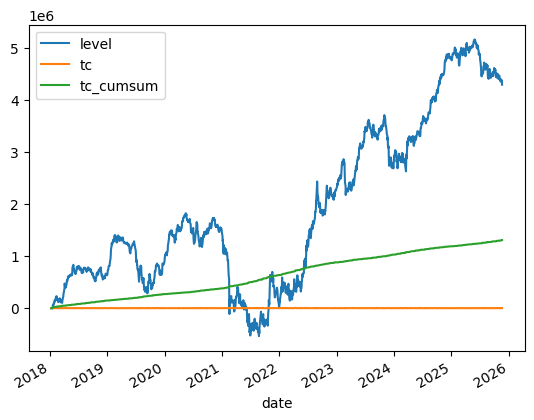

In [2]:
import numpy as np
config = {
    'start_date': start_date,
    'end_date': end_date,
    'roll_start': -12,
    'roll_schedule': "GHJKMNQUVXZF*",
    'roll_dates': 3,
    'max_position': 100,
    'longshort': -1,
    'roll_style': 'monthly',  
    'cost_type':'percentage',
    'roll_out' : 0,
    'vol_target': 900000,
    'round': 1,
    'vol_series':f'{parent_dir}/data/series/P4TC/P4TC_0_9.csv',

}

backtest = VOlROllingBacktest(
    data = contract_df,
    config = config,
    trading_days=business_days,
    last_trading_day=ltds
)
    

results = backtest.run_backtest()
res = process_results(results)
res.plot()

In [3]:
with open(f'strategy/config/p4tc_m.json', 'w', encoding='utf-8') as f:
        json.dump(config, f)
with open(f'strategy/backtest/p4tc_m.pkl', 'wb') as f:
    pickle.dump(results, f)

<Axes: xlabel='date'>

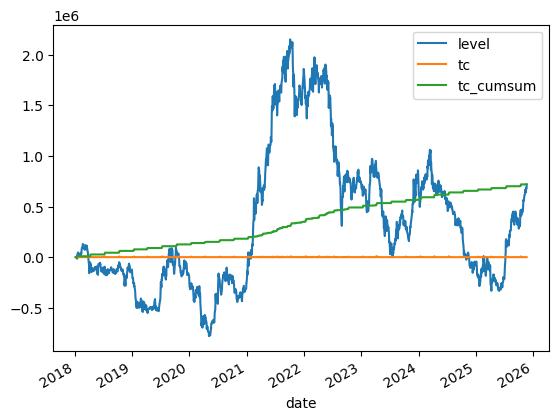

In [4]:
import numpy as np

config = {
    'start_date': start_date,
    'end_date': end_date,
    'roll_start': -15,
    'roll_schedule': "QMQMQMQUQUQUQZQZQZQH*QH*QH*",
    'roll_dates': 3,
    'max_position': 100,
    'longshort': 1,
    'roll_style': 'quarterly',  
    'cost_type':'percentage',
    'roll_out' : 1,
    'vol_target': 900000,
        'round': 1,
        'vol_series':f'{parent_dir}/data/series/P4TC/P4TCQ_0_15.csv',

}

backtest = VOlROllingBacktest(
    data = contract_df,
    config = config,
    trading_days=business_days,
    last_trading_day=ltds
)
    

results = backtest.run_backtest()
res1 = process_results(results)
res1.plot()

In [5]:
with open(f'strategy/config/p4tc_q.json', 'w', encoding='utf-8') as f:
        json.dump(config, f)
with open(f'strategy/backtest/p4tc_q.pkl', 'wb') as f:
    pickle.dump(results, f)

<Axes: xlabel='date'>

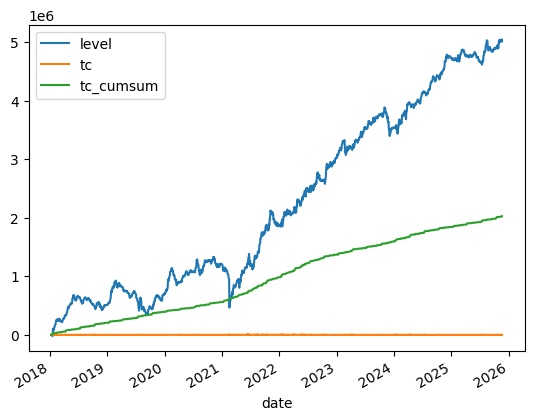

In [6]:
(res1+res).plot()

In [7]:
(res1+res).tail()

,level,tc,tc_cumsum
date,,,
2025-11-14,5.032682e+06,3619.233333,2022210.425
2025-11-17,5.042469e+06,3679.200000,2025889.625
2025-11-18,5.028769e+06,0.000000,2025889.625
2025-11-19,5.033669e+06,0.000000,2025889.625
2025-11-20,5.008169e+06,0.000000,2025889.625
